#  Support Vector Regression (SVR)

---

##  What is SVR?

SVR helps a computer **guess a number** (like price, temperature, etc.) from input.
It draws a **line (or curve)** that stays **close to the real answers** and **ignores small mistakes**.

---

## Example Data

| x (input) | y (real answer) |
| --------: | --------------: |
|         1 |               2 |
|         2 |               3 |
|         3 |             2.5 |

We want the computer to learn how to guess `y` from `x`.

---

## Step-by-Step

---

###  Step 1: Use a Line to Guess

SVR uses this formula:

$$
y = wx + b
$$

Let's say the model finds:

* $w = 0.5$, $b = 1.2$

Then it makes these guesses:

| x | Formula: $0.5x + 1.2$ | Predicted y |
| - | --------------------- | ----------- |
| 1 | 0.5 × 1 + 1.2         | 1.7         |
| 2 | 0.5 × 2 + 1.2         | 2.2         |
| 3 | 0.5 × 3 + 1.2         | 2.7         |

---

###  Step 2: Compare Guess with Real Value

```
Real Values:     ●(2.0)    ●(3.0)   ●(2.5)
                /          |        \
Predicted:    (1.7)      (2.2)     (2.7)
Errors:        0.3        0.8       0.2
```
---

###  Step 3: Set SVR Rules

* **ε (epsilon) = 0.2** → Small errors (≤ 0.2) are allowed
* **C = 1** → Tells the model how much to care about big errors

---

###  Step 4: Apply ε-insensitive Loss

We ignore small errors and only punish errors **greater than ε**:

$$
\text{Loss} = 
\begin{cases}
0 & \text{if error} \leq ε \\
C \times (\text{error} - ε) & \text{if error} > ε
\end{cases}
$$

Let's calculate for each point:

**For x = 1:**
- Error = 0.3
- Since 0.3 > 0.2, Loss = 1 × (0.3 - 0.2) = 1 × 0.1 = **0.1**

**For x = 2:**
- Error = 0.8  
- Since 0.8 > 0.2, Loss = 1 × (0.8 - 0.2) = 1 × 0.6 = **0.6**

**For x = 3:**
- Error = 0.2
- Since 0.2 ≤ 0.2, Loss = **0**

| x | Error | Is Error > ε? | Loss Calculation     | Final Loss |
| - | ----- | ------------- | -------------------- | ---------- |
| 1 | 0.3   | Yes           | 1 × (0.3 - 0.2) = 0.1 | 0.1        |
| 2 | 0.8   | Yes           | 1 × (0.8 - 0.2) = 0.6 | 0.6        |
| 3 | 0.2   | No            | 0                    | 0          |

**Total Error Loss = 0.1 + 0.6 + 0 = 0.7**

---

###  Step 5: Add Simplicity Rule (Regularization)

We want the model to be **simple** — not too sharp or complicated.
So we add a **regularization penalty**:

$$
\text{Regularization} = \frac{1}{2}w^2 = \frac{1}{2}(0.5)^2 = \frac{1}{2} \times 0.25 = 0.125
$$

---

###  Step 6: Final Total Loss

$$
\text{Total Loss} = \text{Total Error Loss} + \text{Regularization}
$$

$$
\text{Total Loss} = 0.7 + 0.125 = \boxed{0.825}
$$

---

##  Why Do We Use `C`?

| Value of C        | Meaning                                 |
| ----------------- | --------------------------------------- |
| Small (e.g., 0.1) | "Mistakes are okay" (relaxed model)     |
| Large (e.g., 100) | "Mistakes are bad!" (very strict model) |

→ `C` controls **how strict** the model is when errors go beyond ε.

---

##  Let's Try Another Example with Different Parameters

### Same data, but:
- **w = 0.6**, **b = 1.0**
- **ε = 0.1**
- **C = 2**

### Step 1: New Predictions

| x | Formula: $0.6x + 1.0$ | Predicted y |
| - | --------------------- | ----------- |
| 1 | 0.6 × 1 + 1.0         | 1.6         |
| 2 | 0.6 × 2 + 1.0         | 2.2         |
| 3 | 0.6 × 3 + 1.0         | 2.8         |

### Step 2: Calculate Errors

| x | Real y | Predicted y | Error |
| - | ------ | ----------- | ----- |
| 1 | 2.0    | 1.6         | 0.4   |
| 2 | 3.0    | 2.2         | 0.8   |
| 3 | 2.5    | 2.8         | 0.3   |

### Step 3: Apply Loss with ε = 0.1, C = 2

**For x = 1:**
- Error = 0.4 > 0.1
- Loss = 2 × (0.4 - 0.1) = 2 × 0.3 = **0.6**

**For x = 2:**
- Error = 0.8 > 0.1  
- Loss = 2 × (0.8 - 0.1) = 2 × 0.7 = **1.4**

**For x = 3:**
- Error = 0.3 > 0.1
- Loss = 2 × (0.3 - 0.1) = 2 × 0.2 = **0.4**

**Total Error Loss = 0.6 + 1.4 + 0.4 = 2.4**

### Step 4: Regularization

$$
\text{Regularization} = \frac{1}{2}w^2 = \frac{1}{2}(0.6)^2 = \frac{1}{2} \times 0.36 = 0.18
$$

### Step 5: Final Total Loss

$$
\text{Total Loss} = 2.4 + 0.18 = \boxed{2.58}
$$

---

## Final Summary Table

| Term              | Meaning                                             |
| ----------------- | --------------------------------------------------- |
| SVR               | A model to guess numbers using a line               |
| ε (epsilon)       | The "no-penalty zone" — small errors are ignored    |
| C                 | Controls how strict the model is about errors       |
| Loss              | Penalty for being wrong beyond ε                    |
| Regularization    | Helps keep the model simple                         |

**Remember:** Lower total loss = better model!

In [14]:
import numpy as np

In [15]:
# Step 1: Data
x = np.array([1, 2, 3])
y = np.array([2.0, 3.0, 2.5])

In [16]:
# Step 2: Model parameters (guessed or pre-trained)
w = 0.5
b = 1.2

In [17]:
# Step 3: SVR settings
epsilon = 0.2
C = 1


In [18]:
# Step 4: Predict y using the line y = w*x + b
y_pred = w * x + b

In [19]:
# Step 5: Compute absolute errors
errors = np.abs(y - y_pred)

In [20]:
# Step 6: Apply epsilon-insensitive loss
losses = []
for err in errors:
    if err <= epsilon:
        losses.append(0)
    else:
        losses.append(C * (err - epsilon))

In [21]:
# Step 7: Regularization term (keep w small)
regularization = 0.5 * (w ** 2)

In [22]:
regularization

0.125

In [23]:
# Step 8: Total loss
total_loss = sum(losses) + regularization

In [24]:
total_loss

np.float64(0.8250000000000002)

In [25]:
import matplotlib.pyplot as plt

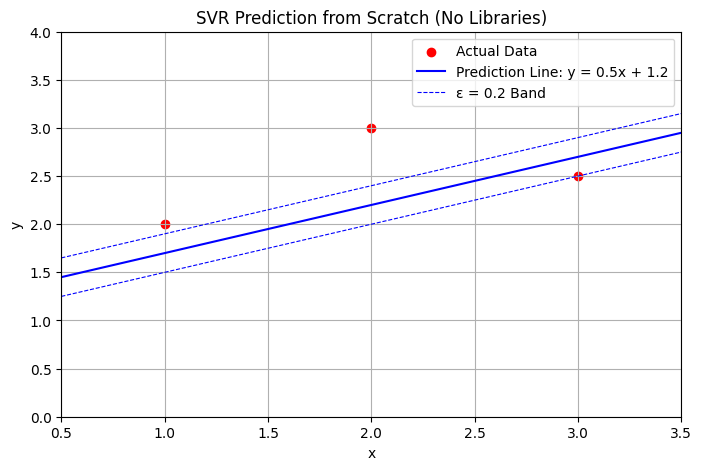

In [26]:
#Plot
x_line = np.linspace(0.5, 3.5, 100)
y_line = w * x_line + b

plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='red', label='Actual Data')
plt.plot(x_line, y_line, color='blue', label='Prediction Line: y = 0.5x + 1.2')

# Optional: Plot epsilon bands
plt.plot(x_line, y_line + epsilon, color='blue', linestyle='--', linewidth=0.8, label='ε = 0.2 Band')
plt.plot(x_line, y_line - epsilon, color='blue', linestyle='--', linewidth=0.8)

plt.title("SVR Prediction from Scratch (No Libraries)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.ylim(0, 4)
plt.xlim(0.5, 3.5)
plt.show()